# Optimizing Alphabet Soup Charity Neural Network 

In [1]:
%matplotlib inline
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./data/charity_data.csv")
application_df = application_df.drop(columns=['EIN','NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Begin bucketing and binning columns

In [2]:
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [3]:
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [4]:
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [5]:
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [6]:
application_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [7]:
application_df.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [8]:
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [9]:
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [10]:
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

### The density cutoffs for 'other' bucket for each column are shown below 
|Column|Cutoff|
|------|------|
|APPLICATION_TYPE|1000|
|AFFILIATION|15000|
|CLASSIFICATION|1000|
|USE_CASE|No Change|
|ORGANIZATION|10000|
|STATUS|no Change|
|INCOME_AMT|500|
|SPECIAL_CONSIDERATIONS|No Change|
|ASK_AMT|Linear|
|IS_SUCCESSFUL|target|

In [11]:
def column_buckets(data, column, cutoff):
    data.copy()
    
    label_list = data[column].value_counts()

    replace_list = list(label_list[label_list < cutoff].index)

    for item in replace_list:
        data[column] = data[column].replace(item,'other')
    
    return data

In [12]:
application_df = column_buckets(application_df, 'APPLICATION_TYPE', 1000)
application_df = column_buckets(application_df, 'AFFILIATION', 15000)
application_df = column_buckets(application_df, 'CLASSIFICATION', 1000)
application_df = column_buckets(application_df, 'ORGANIZATION', 1000)
application_df = column_buckets(application_df, 'INCOME_AMT', 500)

Note the smaller number of buckets

In [13]:
application_df.nunique()

APPLICATION_TYPE             6
AFFILIATION                  3
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 3
STATUS                       2
INCOME_AMT                   7
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

Begin Encoding Data

In [14]:
def get_encoded_columns(data):
    data = data.copy()

    encoded_columns = data.dtypes[data.dtypes == 'object'].index.tolist()

    return encoded_columns

In [15]:
application_cat = get_encoded_columns(application_df)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [16]:
def encode_data(data, encoded_columns):
    data = data.copy()

    # make df of columns to be encoded
    enc_df = data[encoded_columns]

    #initialize the encoder
    enc = OneHotEncoder(sparse=False)
    #fit and transform the encoded columns
    encoded = enc.fit_transform(enc_df)

    encoded_df = pd.DataFrame(encoded)
    encoded_df.columns = enc.get_feature_names_out(encoded_columns)

    data = data.merge(encoded_df, left_index=True, right_index=True).drop(columns=encoded_columns, axis=1)

    return data

In [17]:
application_df = encode_data(application_df, application_cat)
application_df

c:\Users\jsrit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_other,AFFILIATION_CompanySponsored,...,ORGANIZATION_other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T19',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_other',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_other', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Trust', 'ORGANIZATION_other',
       'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_other',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

Begin Preprocessing for Neural Network

In [19]:
# split data
def split_target_data(data, target):
    data = data.copy()

    y = data[target].ravel()

    X = data.copy()
    X = X.drop(columns=target)

    return X, y

In [20]:
#standardize data
def scale_data(train, test):
    scl = StandardScaler()
    xscl = scl.fit(train)
    train_scaled = xscl.transform(train)
    test_scaled = xscl.transform(test)

    return train_scaled, test_scaled

In [21]:
X, y = split_target_data(application_df, 'IS_SUCCESSFUL')

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [23]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Create, Train and Test Neural Network with 2 hidden layers (12 and 10 neurons, respectively)

In [24]:
# make nn model
def make_1h_nn_model(data, n1, n2, act1, act2):
    input_features = len(data[0])

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=n1, input_dim=input_features, activation=act1))
    model.add(tf.keras.layers.Dense(units=n2, activation=act2))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    model.summary()

    return model

In [25]:
# make nn model
def make_2h_nn_model(data, n1, n2, n3, act1, act2, act3):
    input_features = len(data[0])

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=n1, input_dim=input_features, activation=act1))
    model.add(tf.keras.layers.Dense(units=n2, activation=act2))
    model.add(tf.keras.layers.Dense(units=n3, activation=act3))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    model.summary()

    return model

In [26]:
def train_nn_model(model, X_train, y_train, epochs):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    fit_model = model.fit(X_train, y_train, epochs=epochs)

    return fit_model

In [27]:
def evaluate_nn_model(model, fit, X_test, y_test, title):
    model_loss, model_accuracy = model.evaluate(X_test, y_test)
    
    # Text for Graph
    text_string = f'Model Loss: {model_loss:.4f} | Model Accuracy: {model_accuracy:.4f}'
    save_title = title.replace(' -','').replace(' ','_')

    model.save(f'analysis/{save_title}.h5')

    def make_evaluation_df(fit):
        index_range = range(1, len(fit.history['loss'])+1)

        la_df = pd.DataFrame(fit.history, index=index_range)

        return index_range, la_df
    
    index_range, la_df = make_evaluation_df(fit)

    plt.subplots()
    plt.plot(la_df, label=['loss','accuracy'])
    plt.title(f'{title} - Loss/Accuracy - {len(index_range)} Epochs')
    plt.text(x=15, y=0.50, s=text_string)
    plt.legend()
    plt.savefig(f'./analysis/{save_title}_evaluation_graph.png', bbox_inches='tight')
    plt.show()

    print(f'Loss: {model_loss} | Accuracy: {model_accuracy}') 
    print(f'{title}')
    print(la_df.iloc[::5, :])

    return la_df


In [28]:
nn_model = make_1h_nn_model(data=X_train_scaled, n1=12, n2=10, act1='relu', act2='relu')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                420       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [29]:
fit_model = train_nn_model(model=nn_model, X_train=X_train_scaled, y_train=y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5929 - accuracy: 0.7060
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5664 - accuracy: 0.7245
Epoch 3/100
804/804 [==============================] - 1s 990us/step - loss: 0.5613 - accuracy: 0.7278
Epoch 4/100
804/804 [==============================] - 1s 967us/step - loss: 0.5592 - accuracy: 0.7277
Epoch 5/100
804/804 [==============================] - 1s 998us/step - loss: 0.5576 - accuracy: 0.7307
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5565 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7311
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7304
Epoch 9/100
804/804 [==============================] - 1s 990us/step - loss: 0.5543 - accuracy: 0.7317
Epoch 10/100
804/804 [==============================] - 1s 951us/step - loss: 0.553

268/268 [==============================] - 0s 732us/step - loss: 0.5556 - accuracy: 0.7314


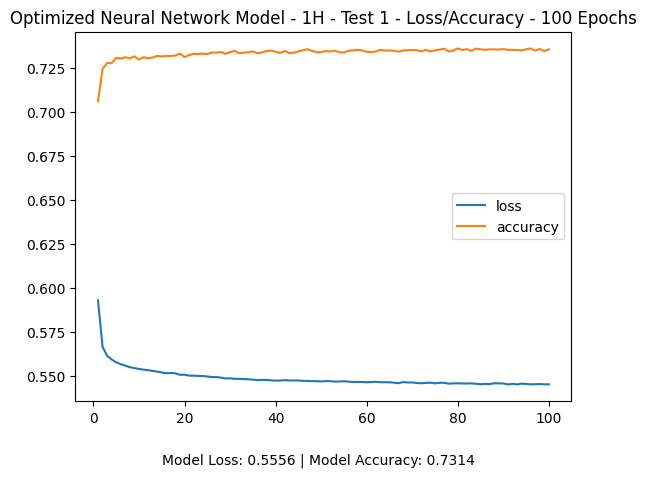

Loss: 0.5556315779685974 | Accuracy: 0.7314285635948181
Optimized Neural Network Model - 1H - Test 1
        loss  accuracy
1   0.592852  0.706033
6   0.556489  0.730369
11  0.553370  0.731146
16  0.551370  0.731807
21  0.549972  0.732351
26  0.549161  0.733751
31  0.548165  0.734722
36  0.547423  0.733401
41  0.547190  0.733556
46  0.546988  0.735072
51  0.546874  0.734684
56  0.546537  0.734800
61  0.546311  0.734100
66  0.545946  0.734722
71  0.545798  0.735072
76  0.545882  0.735500
81  0.545533  0.735228
86  0.545304  0.735306
91  0.544984  0.735306
96  0.544995  0.736122


In [30]:
graph_title = 'Optimized Neural Network Model - 1H - Test 1'
evaluation = evaluate_nn_model(model=nn_model, fit=fit_model, X_test=X_test_scaled, y_test=y_test, title=graph_title)

### Further Optimization Is Necessary
Model Accuracy = 0.7298, Model Loss = 0.5572

Need to reprocess the dataset and repeat the steps above, try removing status and special_considerations to see if there is any improvement in accuracy

In [31]:
# no need to redo the encoding process here 
application_df_reduced = application_df.copy()
application_df_reduced = application_df_reduced.drop(columns=['STATUS','SPECIAL_CONSIDERATIONS_N','SPECIAL_CONSIDERATIONS_Y'], axis=1)

In [32]:
# call split_target_data to split reduced dataset into X and y 
X_reduced, y_reduced = split_target_data(application_df_reduced, 'IS_SUCCESSFUL')
#train test split X and y reduced 
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, random_state=1, stratify=y_reduced)
# scale X train and test reduced
X_train_reduced, X_test_reduced = scale_data(X_train_reduced, X_test_reduced)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                384       
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 525
Trainable params: 525
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5934 - accuracy: 0.7000
Epoch 2/100
804/804 [==============================] - 1s 841us/step - loss: 0.5628 - accuracy: 0.7272
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.7290
Epoch 4/100
804

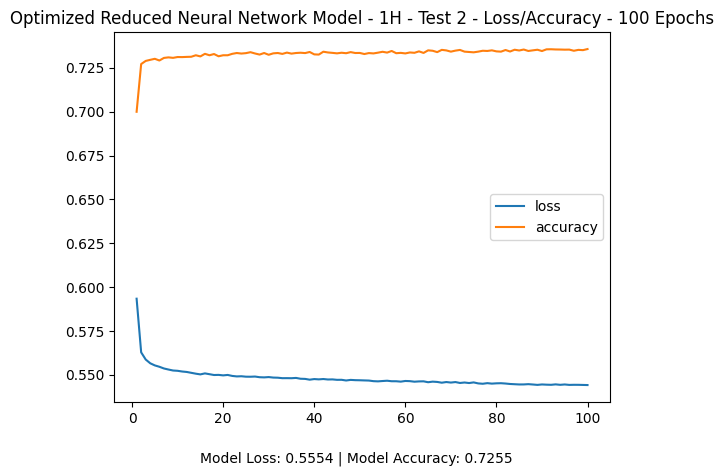

Loss: 0.5554088950157166 | Accuracy: 0.7254810333251953
Optimized Reduced Neural Network Model - 1H - Test 2
        loss  accuracy
1   0.593395  0.699969
6   0.554579  0.729202
11  0.551878  0.731146
16  0.550806  0.733012
21  0.549923  0.732196
26  0.548900  0.733945
31  0.548423  0.733284
36  0.548222  0.733478
41  0.547400  0.732584
46  0.547150  0.733634
51  0.546799  0.732895
56  0.546621  0.733712
61  0.546386  0.733789
66  0.546103  0.734761
71  0.545863  0.734839
76  0.545096  0.734256
81  0.545207  0.734256
86  0.544511  0.735461
91  0.544372  0.735578
96  0.544242  0.735422


In [33]:
nn_model_reduced = make_1h_nn_model(data=X_train_reduced, n1=12, n2=10, act1='relu', act2='relu')
fit_model_reduced = train_nn_model(nn_model_reduced, X_train=X_train_reduced, y_train=y_train_reduced, epochs=100)
graph_title_2 = 'Optimized Reduced Neural Network Model - 1H - Test 2'
evaluation_2 = evaluate_nn_model(model=nn_model_reduced, fit=fit_model_reduced, X_test=X_test_reduced, y_test=y_test_reduced, title=graph_title_2)

### Continue Optimization (Round 3)
Previous Model Accuracy = 0.7272, Model Loss = 0.5552

That made things worse, consider the original dataset, but with a different activation function on the second 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                420       
                                                                 
 dense_7 (Dense)             (None, 10)                130       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 1s 945us/step - loss: 0.5943 - accuracy: 0.7008
Epoch 2/100
804/804 [==============================] - 1s 864us/step - loss: 0.5652 - accuracy: 0.7264
Epoch 3/100
804/804 [==============================] - 1s 888us/step - loss: 0.5610 - accuracy: 0.7282
Epoch 4/100

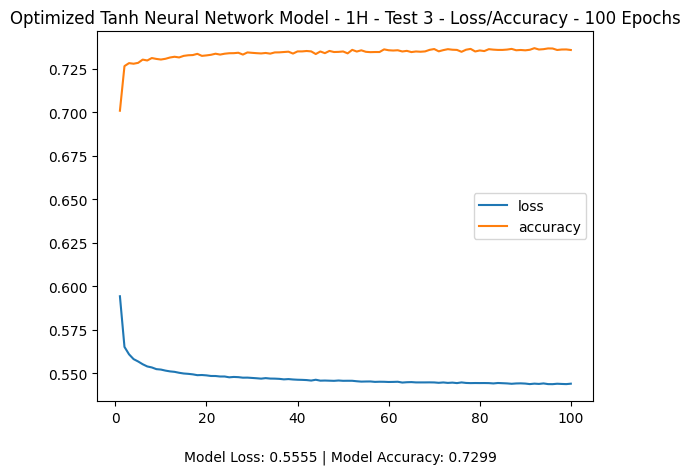

Loss: 0.5555201768875122 | Accuracy: 0.729912519454956
Optimized Tanh Neural Network Model - 1H - Test 3
        loss  accuracy
1   0.594297  0.700824
6   0.555266  0.730174
11  0.551612  0.730641
16  0.549752  0.732662
21  0.548527  0.732934
26  0.547972  0.733867
31  0.547221  0.733867
36  0.546874  0.734334
41  0.546299  0.734878
46  0.545907  0.733867
51  0.545779  0.733751
56  0.545380  0.734450
61  0.545123  0.735383
66  0.544833  0.734839
71  0.544605  0.734917
76  0.544830  0.734645
81  0.544475  0.735072
86  0.544263  0.735928
91  0.543869  0.735811
96  0.543832  0.736549


In [34]:
# lets try with a different activation function
nn_model_tanh = make_1h_nn_model(data=X_train_scaled, n1=12, n2=10, act1='tanh', act2='tanh')
fit_model_tanh = train_nn_model(nn_model_tanh, X_train=X_train_scaled, y_train=y_train, epochs=100)
graph_title_3 = 'Optimized Tanh Neural Network Model - 1H - Test 3'
evaluation_3 = evaluate_nn_model(model=nn_model_tanh, fit=fit_model_tanh, X_test=X_test_scaled, y_test=y_test, title=graph_title_3)

### Final Optimization Attempt
Previous Model Accuracy = 0., Model Loss = 0.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                384       
                                                                 
 dense_10 (Dense)            (None, 10)                130       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 525
Trainable params: 525
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 1s 933us/step - loss: 0.6054 - accuracy: 0.6835
Epoch 2/100
804/804 [==============================] - 1s 871us/step - loss: 0.5676 - accuracy: 0.7233
Epoch 3/100
804/804 [==============================] - 1s 867us/step - loss: 0.5615 - accuracy: 0.7279
Epoch 4/100

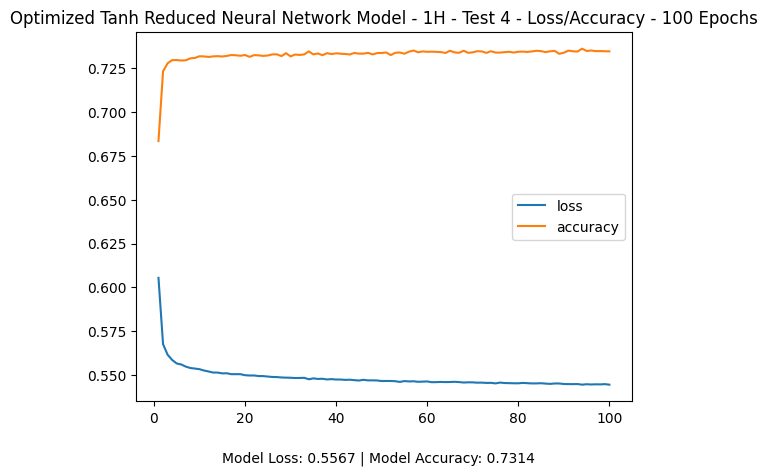

Loss: 0.55666184425354 | Accuracy: 0.7314285635948181
Optimized Tanh Reduced Neural Network Model - 1H - Test 4
        loss  accuracy
1   0.605415  0.683486
6   0.555945  0.729474
11  0.552501  0.731807
16  0.550950  0.732118
21  0.549666  0.731574
26  0.548839  0.732973
31  0.548227  0.732895
36  0.547702  0.733517
41  0.547368  0.733362
46  0.547203  0.733401
51  0.546541  0.734062
56  0.546270  0.734528
61  0.545834  0.734528
66  0.546069  0.734139
71  0.545563  0.734800
76  0.545621  0.733984
81  0.545437  0.734567
86  0.545041  0.734295
91  0.544755  0.735111
96  0.544538  0.735189


In [35]:
# lets try with a different activation function
nn_model_tanh_reduced = make_1h_nn_model(data=X_train_reduced, n1=12, n2=10, act1='tanh', act2='tanh')
fit_model_tanh_reduced = train_nn_model(nn_model_tanh_reduced, X_train=X_train_reduced, y_train=y_train_reduced, epochs=100)
graph_title_4 = 'Optimized Tanh Reduced Neural Network Model - 1H - Test 4'
evaluation_4 = evaluate_nn_model(model=nn_model_tanh_reduced, fit=fit_model_tanh_reduced, X_test=X_test_reduced, y_test=y_test_reduced, title=graph_title_4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                420       
                                                                 
 dense_13 (Dense)            (None, 10)                130       
                                                                 
 dense_14 (Dense)            (None, 8)                 88        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 1s 980us/step - loss: 0.5897 - accuracy: 0.7091
Epoch 2/100
804/804 [==============================] - 1s 972us/step - loss: 0.5620 -

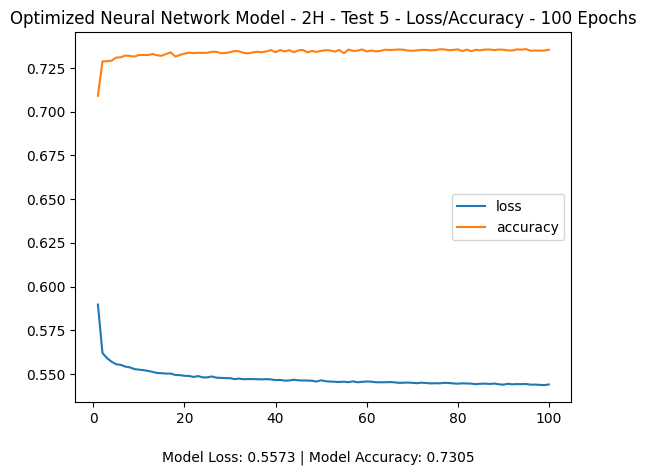

Loss: 0.5572522282600403 | Accuracy: 0.7304956316947937
Optimized Neural Network Model - 2H - Test 5
        loss  accuracy
1   0.589723  0.709143
6   0.555267  0.731146
11  0.552236  0.732429
16  0.550268  0.733051
21  0.548912  0.733789
26  0.548624  0.734256
31  0.547101  0.734722
36  0.547050  0.734295
41  0.546645  0.735267
46  0.546323  0.735306
51  0.545910  0.735189
56  0.545334  0.735539
61  0.545654  0.735033
66  0.545317  0.735383
71  0.544767  0.735072
76  0.544683  0.735733
81  0.544707  0.734722
86  0.544516  0.735578
91  0.544436  0.735072
96  0.543933  0.734878


In [36]:
nn_2h_model = make_2h_nn_model(data=X_train_scaled, n1=12, n2=10, n3=8, act1='relu', act2='relu', act3='relu')
fit_2h_model = train_nn_model(model=nn_2h_model, X_train=X_train_scaled, y_train=y_train, epochs=100)
graph_title_2h = 'Optimized Neural Network Model - 2H - Test 5'
evaluation_2h = evaluate_nn_model(model=nn_2h_model, fit=fit_2h_model, X_test=X_test_scaled, y_test=y_test, title=graph_title_2h)